In [153]:
from scipy.integrate import odeint
from scipy.optimize import fmin
import numpy as np
import time
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d ### Might be useful
from scipy.optimize import fsolve

In [94]:
### Utils
def plot_ode_solution(S,I,Z,t,model):
    plt.plot(t,S,label="Susceptible")
    plt.plot(t,I,label="Infected")
    plt.plot(t,Z,label="Recovered")
    plt.title(f"Plot of S-I-Z functions ({model})")
    plt.xlabel("Time (t)")
    plt.ylabel("Number of individuals")
    plt.legend(loc="upper right")
    plt.rcParams["figure.figsize"] = (10,6)
    plt.show()

Article Examples:

1. A mathematical model with nonlinear relapse: conditions for a forward-backward bifurcation.
2. Adaptive human behavior in epidemiological models.

In [175]:
def state_odes_system(x, t, beta, mu, phi, gamma, cs, ci, cz):
    
    # assign each function to a vector element
    s = x[0]
    i = x[1]
    z = x[2]
    
    # C function 
    C = cs(t)*ci(t)/(s*cs(t) + i*ci(t) + z*cz(t) )
    
    # System 
    dSdt = -C*beta*s*i + mu - mu*s
    dIdt = C*beta*s*i + phi*z*i - (gamma+mu)*i  
    dZdt = gamma*i - phi*z*i - mu*z

    return [dSdt, dIdt, dZdt]

def solve_odes_system(x0, t_max, h, beta, mu, phi, gamma, cs, ci, cz):
    
    """
    Solve the classical system with initial conditions
    """
    
    t = np.linspace(0,t_max,int(t_max/h))
    x = odeint(state_odes_system, x0, t, args=(beta, mu, phi, gamma, cs, ci, cz))

    s = x[:,0]
    i = x[:,1]
    z = x[:,2]
    
    return s,i,z

Example of Article (1). Figure 2.

In [173]:
mu = 0.00015
gamma = 0.0027
beta = 0.009
nu = 0.8
phi = 0.0044
t_max=2000
h=t_max/1000
t = np.linspace(0,t_max,int(t_max/h))
x0=[0.85,0.1,0.05]

In [177]:
def equilibrium_kappa(kappa):
    
    """ cs,ci,cz as functions or constants """
    
    def cs(t):
        return kappa
    def ci(t):
        return kappa
    def cz(t):
        return kappa*nu
    
    print(f"""
    - kappa : {kappa}
    - R0 : {beta*kappa/(mu+gamma)}
    """)
    
    s,i,z = solve_odes_system(x0, t_max, h, beta, mu, phi, gamma, cs, ci, cz)
    return s,i,z


    - kappa : 0.98
    - R0 : 3.094736842105263
    


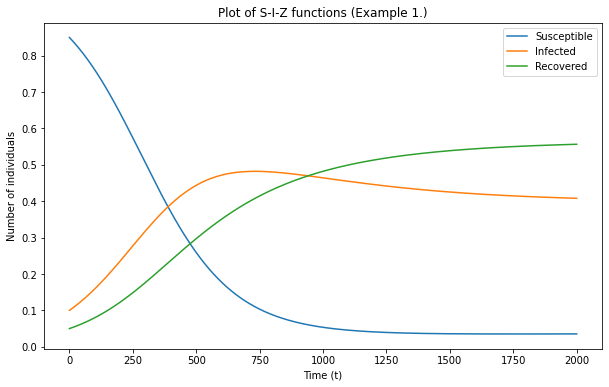

In [178]:
sol=equilibrium_kappa(kappa)
plot_ode_solution(sol[0],sol[1],sol[2],t,model="Example 1.")

In [154]:
### Roots of this polynomial ###

In [208]:
from sympy.solvers import solve
from sympy import Symbol

In [207]:
sols

[-0.0642513131213645 + 0.e-23*I,
 -0.0307424582400373 - 0.e-23*I,
 0.398255985337902 - 0.e-22*I]

In [324]:
def evaluate_polynomial(i,mu,gamma,beta,nu,phi,ci,cs,cz):
    R0 = beta*ci/(mu+gamma)
    Rphi = phi/(mu+gamma)
    Rmu = mu/(mu+gamma)
    wp = (phi*i + mu)*(1-i) - gamma*i
    poly = cs*R0*wp*(Rphi*i + Rmu) - (1+Rphi*i)*(  Rmu*wp*(cs-cz) + mu*(Rphi*i+Rmu)*(i*(ci-cz) +cz)  )
    return poly 

def evaluate_polynomial_art1(i,mu,gamma,beta,nu,phi):
    R0 = beta*ci/(mu+gamma)
    Rphi = phi/(mu+gamma)
    Rmu = mu/(mu+gamma)
    wp = (phi*i + mu)*(1-i) - gamma*i
    poly = R0*wp*(Rphi*i + Rmu)- (1+Rphi*i)*(  Rmu*wp*(1-nu) +mu*(Rphi*i+Rmu)*(i*(1-nu) + nu))
    return poly

def evaluate_real_polynomial_art1(i,mu,gamma,beta,nu,phi,kappa):
    R0 = beta*kappa/(mu+gamma)
    Rphi = phi/(mu+gamma)
    Rmu = mu/(mu+gamma)
    
    print(f"""
    
    R0: {R0}
    Rphi :{Rphi}
    Rmu :{Rmu}
    
    """)
    
    x3= R0*Rphi**2
    x2= Rphi*(R0*(1-Rphi)+Rmu*(R0+Rphi)+ nu*Rmu*(1-Rmu))
    x1= Rmu*(nu*(1-Rmu)+R0*(1-Rphi)+Rphi*(1-R0)+Rmu*Rphi)
    x0= (1-R0)*Rmu**2
    return x3*i**3 + x2*i**2 + x1*i + x0

def solve_polynomial(mu,gamma,beta,nu,phi,ci,cs,cz):
    
    R0 = beta*ci/(mu+gamma)
    print(f"""
    -R0 : {R0}
    """)
    # Numeric
    #resp=fsolve(evaluate_polynomial, 0, args=(mu,gamma,beta,nu,phi,ci,cs,cz))
    
    # Symbolic
    x = Symbol('x')
    
    resp = solve(evaluate_real_polynomial_art1(x,mu,gamma,beta,nu,phi,ci), x)
    print(resp)
    resp = [expr.as_real_imag()[0] for expr in resp if expr.as_real_imag()[1]<1e-15 and expr.as_real_imag()[0]>0]
   
    return resp

In [325]:
kappa=0.325
solve_polynomial(mu,gamma,beta,nu,phi,ci=kappa,cs=kappa,cz=kappa*nu)


    -R0 : 1.0263157894736843
    

    
    R0: 1.0263157894736843
    Rphi :1.5438596491228072
    Rmu :0.05263157894736841
    
    
[0.218702873667376, 0.0115110340287827 - 0.00193722971607591*I, 0.0115110340287827 + 0.00193722971607591*I]


[0.218702873667376, 0.0115110340287827]

In [ ]:
### Does this polynomial have roots
### Let's see the case 

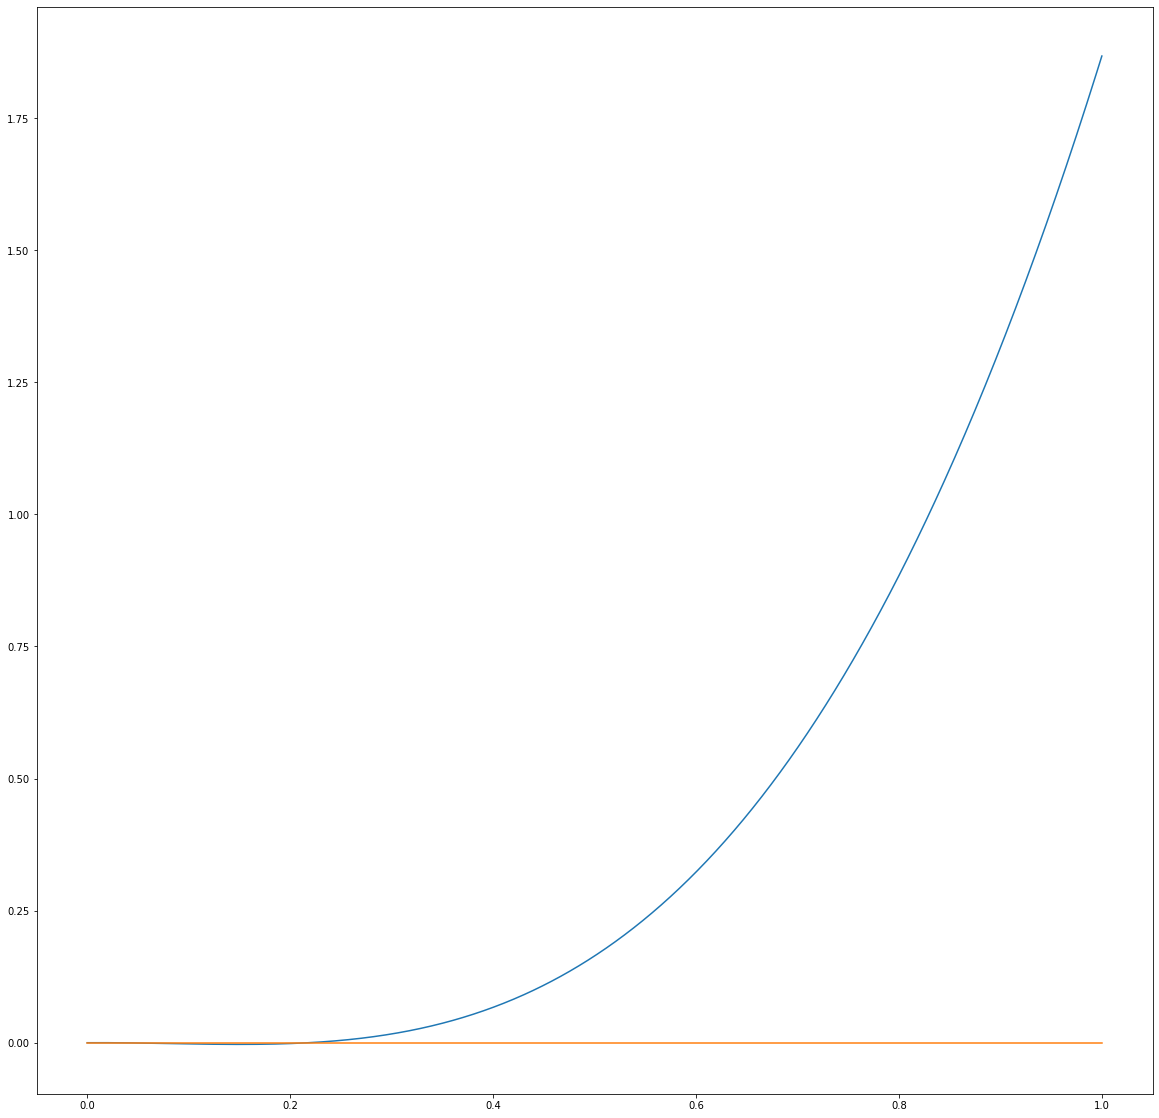

In [318]:
i0 = np.linspace(0,1,1000)
pols=np.array([evaluate_real_polynomial_art1(i,mu,gamma,beta,nu,phi,kappa) for i in i0])
plt.plot(i0,pols,label="Polynomial3")
plt.rcParams["figure.figsize"] = (20,20)
plt.plot(i0,np.array([0]*1000))

In [319]:
def coeff_real_polynomial_art1(mu,gamma,beta,nu,phi,kappa):
    R0 = beta*kappa/(mu+gamma)
    Rphi = phi/(mu+gamma)
    Rmu = mu/(mu+gamma)
    x3= R0*Rphi**2
    x2= Rphi*(R0*(1-Rphi)+Rmu*(R0+Rphi)+ nu*Rmu*(1-Rmu))
    x1= Rmu*(nu*(1-Rmu)+R0*(1-Rphi)+Rphi*(1-R0)+Rmu*Rphi)
    x0= (1-R0)*Rmu**2
    return x3,x2,x1,x0

In [320]:
coeff_real_polynomial_art1(mu,gamma,beta,nu,phi,kappa)

(2.4462263692472184,
 -0.5913139265522999,
 0.012650046168051692,
 -7.289692374981796e-05)